In [954]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd 
import tensorflow as tf 
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random 
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [287]:
main_df = pd.read_csv('ultimate_dataset_default_index.csv')

In [288]:
main_df.head()

,Unnamed: 0,header.normalizedJobTitle,map.employerName,overview.revenue,overview.size,salary.salaries,reviews.val.reviewRatings.careerOpportunities,reviews.val.reviewRatings.compBenefits,reviews.val.reviewRatings.cultureValues,reviews.val.reviewRatings.seniorManagement,reviews.val.reviewRatings.worklifeBalance,reviews.val.summaryPoints.ceoApproval,gaTrackerData.sector_Accounting & Legal,gaTrackerData.sector_Aerospace & Defense,gaTrackerData.sector_Agriculture & Forestry,"gaTrackerData.sector_Arts, Entertainment & Recreation",gaTrackerData.sector_Biotech & Pharmaceuticals,gaTrackerData.sector_Business Services,"gaTrackerData.sector_Construction, Repair & Maintenance",gaTrackerData.sector_Consumer Services,gaTrackerData.sector_Education,gaTrackerData.sector_Finance,gaTrackerData.sector_Government,gaTrackerData.sector_Health Care,gaTrackerData.sector_Information Technology,gaTrackerData.sector_Insurance,gaTrackerData.sector_Manufacturing,gaTrackerData.sector_Media,gaTrackerData.sector_Mining & Metals,gaTrackerData.sector_Non-Profit,"gaTrackerData.sector_Oil, Gas, Energy & Utilities",gaTrackerData.sector_Real Estate,"gaTrackerData.sector_Restaurants, Bars & Food Services",gaTrackerData.sector_Retail,gaTrackerData.sector_Telecommunications,gaTrackerData.sector_Transportation & Logistics,gaTrackerData.sector_Travel & Tourism,new_location_Australia,new_location_Canada,new_location_England,new_location_France,new_location_Germany,new_location_Poland,new_location_Scotland,new_location_USA,reviews.val.reviewerDuration_for less than a year,reviews.val.reviewerDuration_for more than 10 years,reviews.val.reviewerDuration_for more than 2 years,reviews.val.reviewerDuration_for more than 3 years,reviews.val.reviewerDuration_for more than 4 years,reviews.val.reviewerDuration_for more than 5 years,reviews.val.reviewerDuration_for more than 8 years,reviews.val.reviewerDuration_for more than a year,reviews.val.reviewerInformation_Current Employee,reviews.val.reviewerInformation_Former Employee,reviews.val.reviewRatings.overall
0,0,Assistant data analyst,Saint-Gobain,7500000000,7501,48816,5,4,5,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5
1,1,Assistant data analyst,Orange,7500000000,7501,97305,5,4,4,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5
2,2,Assistant data analyst,Orange,7500000000,7501,138911,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5
3,3,Assistant data analyst,Showroomprive.com,1500000000,3001,38964,4,3,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5
4,4,Assistant data analyst,Showroomprive.com,1500000000,3001,99299,4,4,5,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4


In [289]:
main_df['overview.revenue'] = main_df['overview.revenue'].astype(str)

In [290]:
main_df['overview.revenue']

0       7500000000
1       7500000000
2       7500000000
3       1500000000
4       1500000000
           ...    
4676     300000000
4677      75000000
4678      75000000
4679      75000000
4680    7500000000
Name: overview.revenue, Length: 4681, dtype: object

In [291]:
main_df['overview.size'] = main_df['overview.size'].astype(str)

In [292]:
main_df = pd.get_dummies(data = main_df , columns=['overview.revenue' , 'overview.size'])

In [293]:
pd.set_option('display.max_columns' , None)

In [294]:
main_df.head()

,Unnamed: 0,header.normalizedJobTitle,map.employerName,salary.salaries,reviews.val.reviewRatings.careerOpportunities,reviews.val.reviewRatings.compBenefits,reviews.val.reviewRatings.cultureValues,reviews.val.reviewRatings.seniorManagement,reviews.val.reviewRatings.worklifeBalance,reviews.val.summaryPoints.ceoApproval,gaTrackerData.sector_Accounting & Legal,gaTrackerData.sector_Aerospace & Defense,gaTrackerData.sector_Agriculture & Forestry,"gaTrackerData.sector_Arts, Entertainment & Recreation",gaTrackerData.sector_Biotech & Pharmaceuticals,gaTrackerData.sector_Business Services,"gaTrackerData.sector_Construction, Repair & Maintenance",gaTrackerData.sector_Consumer Services,gaTrackerData.sector_Education,gaTrackerData.sector_Finance,gaTrackerData.sector_Government,gaTrackerData.sector_Health Care,gaTrackerData.sector_Information Technology,gaTrackerData.sector_Insurance,gaTrackerData.sector_Manufacturing,gaTrackerData.sector_Media,gaTrackerData.sector_Mining & Metals,gaTrackerData.sector_Non-Profit,"gaTrackerData.sector_Oil, Gas, Energy & Utilities",gaTrackerData.sector_Real Estate,"gaTrackerData.sector_Restaurants, Bars & Food Services",gaTrackerData.sector_Retail,gaTrackerData.sector_Telecommunications,gaTrackerData.sector_Transportation & Logistics,gaTrackerData.sector_Travel & Tourism,new_location_Australia,new_location_Canada,new_location_England,new_location_France,new_location_Germany,new_location_Poland,new_location_Scotland,new_location_USA,reviews.val.reviewerDuration_for less than a year,reviews.val.reviewerDuration_for more than 10 years,reviews.val.reviewerDuration_for more than 2 years,reviews.val.reviewerDuration_for more than 3 years,reviews.val.reviewerDuration_for more than 4 years,reviews.val.reviewerDuration_for more than 5 years,reviews.val.reviewerDuration_for more than 8 years,reviews.val.reviewerDuration_for more than a year,reviews.val.reviewerInformation_Current Employee,reviews.val.reviewerInformation_Former Employee,reviews.val.reviewRatings.overall,overview.revenue_1500000000,overview.revenue_17500000,overview.revenue_3000000,overview.revenue_300000000,overview.revenue_3500000000,overview.revenue_37500000,overview.revenue_500000,overview.revenue_7500000,overview.revenue_75000000,overview.revenue_750000000,overview.revenue_7500000000,overview.size_10000,overview.size_126,overview.size_3001,overview.size_351,overview.size_50,overview.size_7501,overview.size_751
0,0,Assistant data analyst,Saint-Gobain,48816,5,4,5,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,Assistant data analyst,Orange,97305,5,4,4,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,Assistant data analyst,Orange,138911,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,3,Assistant data analyst,Showroomprive.com,38964,4,3,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Assistant data analyst,Showroomprive.com,99299,4,4,5,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [295]:
main_df = main_df.drop(labels = ['Unnamed: 0', 'header.normalizedJobTitle', 'map.employerName'] , axis = 1)

In [296]:
main_df['salary.salaries'] = main_df['salary.salaries'].apply(lambda x : x*12 if x<= 10000 else x)

In [297]:
pd.set_option('display.max_columns', None)

In [298]:
main_df.head()

,salary.salaries,reviews.val.reviewRatings.careerOpportunities,reviews.val.reviewRatings.compBenefits,reviews.val.reviewRatings.cultureValues,reviews.val.reviewRatings.seniorManagement,reviews.val.reviewRatings.worklifeBalance,reviews.val.summaryPoints.ceoApproval,gaTrackerData.sector_Accounting & Legal,gaTrackerData.sector_Aerospace & Defense,gaTrackerData.sector_Agriculture & Forestry,"gaTrackerData.sector_Arts, Entertainment & Recreation",gaTrackerData.sector_Biotech & Pharmaceuticals,gaTrackerData.sector_Business Services,"gaTrackerData.sector_Construction, Repair & Maintenance",gaTrackerData.sector_Consumer Services,gaTrackerData.sector_Education,gaTrackerData.sector_Finance,gaTrackerData.sector_Government,gaTrackerData.sector_Health Care,gaTrackerData.sector_Information Technology,gaTrackerData.sector_Insurance,gaTrackerData.sector_Manufacturing,gaTrackerData.sector_Media,gaTrackerData.sector_Mining & Metals,gaTrackerData.sector_Non-Profit,"gaTrackerData.sector_Oil, Gas, Energy & Utilities",gaTrackerData.sector_Real Estate,"gaTrackerData.sector_Restaurants, Bars & Food Services",gaTrackerData.sector_Retail,gaTrackerData.sector_Telecommunications,gaTrackerData.sector_Transportation & Logistics,gaTrackerData.sector_Travel & Tourism,new_location_Australia,new_location_Canada,new_location_England,new_location_France,new_location_Germany,new_location_Poland,new_location_Scotland,new_location_USA,reviews.val.reviewerDuration_for less than a year,reviews.val.reviewerDuration_for more than 10 years,reviews.val.reviewerDuration_for more than 2 years,reviews.val.reviewerDuration_for more than 3 years,reviews.val.reviewerDuration_for more than 4 years,reviews.val.reviewerDuration_for more than 5 years,reviews.val.reviewerDuration_for more than 8 years,reviews.val.reviewerDuration_for more than a year,reviews.val.reviewerInformation_Current Employee,reviews.val.reviewerInformation_Former Employee,reviews.val.reviewRatings.overall,overview.revenue_1500000000,overview.revenue_17500000,overview.revenue_3000000,overview.revenue_300000000,overview.revenue_3500000000,overview.revenue_37500000,overview.revenue_500000,overview.revenue_7500000,overview.revenue_75000000,overview.revenue_750000000,overview.revenue_7500000000,overview.size_10000,overview.size_126,overview.size_3001,overview.size_351,overview.size_50,overview.size_7501,overview.size_751
0,48816,5,4,5,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,97305,5,4,4,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,138911,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,38964,4,3,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,99299,4,4,5,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [299]:
main_df.columns

Index(['salary.salaries', 'reviews.val.reviewRatings.careerOpportunities',
       'reviews.val.reviewRatings.compBenefits',
       'reviews.val.reviewRatings.cultureValues',
       'reviews.val.reviewRatings.seniorManagement',
       'reviews.val.reviewRatings.worklifeBalance',
       'reviews.val.summaryPoints.ceoApproval',
       'gaTrackerData.sector_Accounting & Legal',
       'gaTrackerData.sector_Aerospace & Defense',
       'gaTrackerData.sector_Agriculture & Forestry',
       'gaTrackerData.sector_Arts, Entertainment & Recreation',
       'gaTrackerData.sector_Biotech & Pharmaceuticals',
       'gaTrackerData.sector_Business Services',
       'gaTrackerData.sector_Construction, Repair & Maintenance',
       'gaTrackerData.sector_Consumer Services',
       'gaTrackerData.sector_Education', 'gaTrackerData.sector_Finance',
       'gaTrackerData.sector_Government', 'gaTrackerData.sector_Health Care',
       'gaTrackerData.sector_Information Technology',
       'gaTrackerData.sector

In [750]:
main_df = main_df[['salary.salaries', 'reviews.val.reviewRatings.careerOpportunities',
       'reviews.val.reviewRatings.compBenefits',
       'reviews.val.reviewRatings.cultureValues',
       'reviews.val.reviewRatings.seniorManagement',
       'reviews.val.reviewRatings.worklifeBalance',
       'reviews.val.summaryPoints.ceoApproval',
       'gaTrackerData.sector_Accounting & Legal',
       'gaTrackerData.sector_Aerospace & Defense',
       'gaTrackerData.sector_Agriculture & Forestry',
       'gaTrackerData.sector_Arts, Entertainment & Recreation',
       'gaTrackerData.sector_Biotech & Pharmaceuticals',
       'gaTrackerData.sector_Business Services',
       'gaTrackerData.sector_Construction, Repair & Maintenance',
       'gaTrackerData.sector_Consumer Services',
       'gaTrackerData.sector_Education', 'gaTrackerData.sector_Finance',
       'gaTrackerData.sector_Government', 'gaTrackerData.sector_Health Care',
       'gaTrackerData.sector_Information Technology',
       'gaTrackerData.sector_Insurance', 'gaTrackerData.sector_Manufacturing',
       'gaTrackerData.sector_Media', 'gaTrackerData.sector_Mining & Metals',
       'gaTrackerData.sector_Non-Profit',
       'gaTrackerData.sector_Oil, Gas, Energy & Utilities',
       'gaTrackerData.sector_Real Estate',
       'gaTrackerData.sector_Restaurants, Bars & Food Services',
       'gaTrackerData.sector_Retail',
       'gaTrackerData.sector_Telecommunications',
       'gaTrackerData.sector_Transportation & Logistics',
       'gaTrackerData.sector_Travel & Tourism', 'new_location_Australia',
       'new_location_Canada', 'new_location_England', 'new_location_France',
       'new_location_Germany', 'new_location_Poland', 'new_location_Scotland',
       'new_location_USA', 'reviews.val.reviewerDuration_for less than a year',
       'reviews.val.reviewerDuration_for more than 10 years',
       'reviews.val.reviewerDuration_for more than 2 years',
       'reviews.val.reviewerDuration_for more than 3 years',
       'reviews.val.reviewerDuration_for more than 4 years',
       'reviews.val.reviewerDuration_for more than 5 years',
       'reviews.val.reviewerDuration_for more than 8 years',
       'reviews.val.reviewerDuration_for more than a year',
       'reviews.val.reviewerInformation_Current Employee',
       'reviews.val.reviewerInformation_Former Employee',
        'overview.revenue_1500000000',
       'overview.revenue_17500000', 'overview.revenue_3000000',
       'overview.revenue_300000000', 'overview.revenue_3500000000',
       'overview.revenue_37500000', 'overview.revenue_500000',
       'overview.revenue_7500000', 'overview.revenue_75000000',
       'overview.revenue_750000000', 'overview.revenue_7500000000',
       'overview.size_10000', 'overview.size_126', 'overview.size_3001',
       'overview.size_351', 'overview.size_50', 'overview.size_7501',
       'overview.size_751', 'reviews.val.reviewRatings.overall',]]

In [751]:
main_df.head()

,salary.salaries,reviews.val.reviewRatings.careerOpportunities,reviews.val.reviewRatings.compBenefits,reviews.val.reviewRatings.cultureValues,reviews.val.reviewRatings.seniorManagement,reviews.val.reviewRatings.worklifeBalance,reviews.val.summaryPoints.ceoApproval,gaTrackerData.sector_Accounting & Legal,gaTrackerData.sector_Aerospace & Defense,gaTrackerData.sector_Agriculture & Forestry,"gaTrackerData.sector_Arts, Entertainment & Recreation",gaTrackerData.sector_Biotech & Pharmaceuticals,gaTrackerData.sector_Business Services,"gaTrackerData.sector_Construction, Repair & Maintenance",gaTrackerData.sector_Consumer Services,gaTrackerData.sector_Education,gaTrackerData.sector_Finance,gaTrackerData.sector_Government,gaTrackerData.sector_Health Care,gaTrackerData.sector_Information Technology,gaTrackerData.sector_Insurance,gaTrackerData.sector_Manufacturing,gaTrackerData.sector_Media,gaTrackerData.sector_Mining & Metals,gaTrackerData.sector_Non-Profit,"gaTrackerData.sector_Oil, Gas, Energy & Utilities",gaTrackerData.sector_Real Estate,"gaTrackerData.sector_Restaurants, Bars & Food Services",gaTrackerData.sector_Retail,gaTrackerData.sector_Telecommunications,gaTrackerData.sector_Transportation & Logistics,gaTrackerData.sector_Travel & Tourism,new_location_Australia,new_location_Canada,new_location_England,new_location_France,new_location_Germany,new_location_Poland,new_location_Scotland,new_location_USA,reviews.val.reviewerDuration_for less than a year,reviews.val.reviewerDuration_for more than 10 years,reviews.val.reviewerDuration_for more than 2 years,reviews.val.reviewerDuration_for more than 3 years,reviews.val.reviewerDuration_for more than 4 years,reviews.val.reviewerDuration_for more than 5 years,reviews.val.reviewerDuration_for more than 8 years,reviews.val.reviewerDuration_for more than a year,reviews.val.reviewerInformation_Current Employee,reviews.val.reviewerInformation_Former Employee,overview.revenue_1500000000,overview.revenue_17500000,overview.revenue_3000000,overview.revenue_300000000,overview.revenue_3500000000,overview.revenue_37500000,overview.revenue_500000,overview.revenue_7500000,overview.revenue_75000000,overview.revenue_750000000,overview.revenue_7500000000,overview.size_10000,overview.size_126,overview.size_3001,overview.size_351,overview.size_50,overview.size_7501,overview.size_751,reviews.val.reviewRatings.overall
0,48816,5,4,5,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5
1,97305,5,4,4,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5
2,138911,5,5,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5
3,38964,4,3,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5
4,99299,4,4,5,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4


In [752]:
len(main_df.columns)

69

In [753]:
main_df.iloc[:,68]

0       5
1       5
2       5
3       5
4       4
       ..
4676    3
4677    5
4678    3
4679    4
4680    4
Name: reviews.val.reviewRatings.overall, Length: 4681, dtype: int64

In [754]:
X = main_df.iloc[:,0:67].values
y = main_df.iloc[:,68].values   

In [755]:
scaler = MinMaxScaler()
X_scaler = scaler.fit(X)
X_scaled = X_scaler.transform(X)

In [756]:
X.shape

(4681, 67)

In [757]:
y = y.reshape(-1,1)

In [758]:
X_train.shape

(3510, 67)

In [760]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled, y , random_state = 21)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac02b0b580>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac02b0b2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac6ff8ff70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac75878940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac75878910>],
 'means': []}

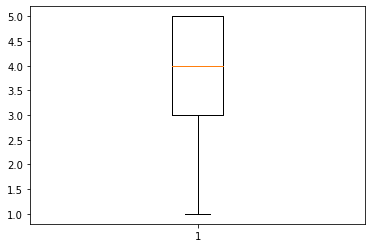

In [761]:
plt.boxplot(y)

In [762]:
X.shape

(4681, 67)

In [763]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [764]:
def scheduler(epoch, lr = 0.1): 
    initial_rate = lr 
    k = 0.9
    if epoch > 160:
        return lr * math.exp(-k*epoch)
    else:
        return initial_rate

In [780]:
def lr_step_decay(epoch, lr = 0.1):
    drop_rate = 0.5
    epochs_drop = 10.0
    initial_learning_rate = lr
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

In [802]:
initial_learning_rate = 0.01
epochs = 100
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

In [803]:
lrate = LearningRateScheduler(scheduler)

In [1014]:
base_model1 = Sequential()
base_model1.add(Dense(134, input_dim = X_train.shape[1], activation = 'softmax'))
base_model1.add(Dense(134, activation = 'softmax'))
base_model1.add(Dense(6, activation = 'sigmoid'))
base_model1.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [1015]:
model_performance = base_model1.fit(X_train , y_train , epochs =120, batch_size =64 , validation_split= 0.2, callbacks= [LearningRateScheduler(lr_time_based_decay)])

Epoch 1/120
44/44 [==============================] - ETA: 0s - loss: 1.7805 - accuracy: 0.270 - 1s 5ms/step - loss: 1.7771 - accuracy: 0.2901 - val_loss: 1.7334 - val_accuracy: 0.4131
Epoch 2/120
44/44 [==============================] - 0s 3ms/step - loss: 1.7146 - accuracy: 0.4376 - val_loss: 1.6821 - val_accuracy: 0.4131
Epoch 3/120
44/44 [==============================] - 0s 3ms/step - loss: 1.6637 - accuracy: 0.4256 - val_loss: 1.6386 - val_accuracy: 0.4131
Epoch 4/120
44/44 [==============================] - 0s 3ms/step - loss: 1.6167 - accuracy: 0.4125 - val_loss: 1.6013 - val_accuracy: 0.4131
Epoch 5/120
44/44 [==============================] - 0s 3ms/step - loss: 1.5804 - accuracy: 0.4211 - val_loss: 1.5697 - val_accuracy: 0.4131
Epoch 6/120
44/44 [==============================] - 0s 3ms/step - loss: 1.5486 - accuracy: 0.4212 - val_loss: 1.5432 - val_accuracy: 0.4131
Epoch 7/120
44/44 [==============================] - 0s 3ms/step - loss: 1.5174 - accuracy: 0.4076 - val_loss: 

44/44 [==============================] - 0s 3ms/step - loss: 0.8917 - accuracy: 0.6225 - val_loss: 0.9515 - val_accuracy: 0.5840
Epoch 59/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.6431 - val_loss: 0.9465 - val_accuracy: 0.5912
Epoch 60/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.6226 - val_loss: 0.9444 - val_accuracy: 0.5798
Epoch 61/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8780 - accuracy: 0.6296 - val_loss: 0.9396 - val_accuracy: 0.5897
Epoch 62/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.6311 - val_loss: 0.9351 - val_accuracy: 0.5997
Epoch 63/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8812 - accuracy: 0.6256 - val_loss: 0.9330 - val_accuracy: 0.5855
Epoch 64/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8737 - accuracy: 0.6285 - val_loss: 0.9284 - val_accuracy: 0.5912
Epoch 65/120
44/44 

Epoch 116/120
44/44 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.7185 - val_loss: 0.8455 - val_accuracy: 0.6595
Epoch 117/120
44/44 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.7128 - val_loss: 0.8454 - val_accuracy: 0.6624
Epoch 118/120
44/44 [==============================] - 0s 3ms/step - loss: 0.7480 - accuracy: 0.7083 - val_loss: 0.8463 - val_accuracy: 0.6595
Epoch 119/120
44/44 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.7019 - val_loss: 0.8457 - val_accuracy: 0.6524
Epoch 120/120
44/44 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.7294 - val_loss: 0.8446 - val_accuracy: 0.6610


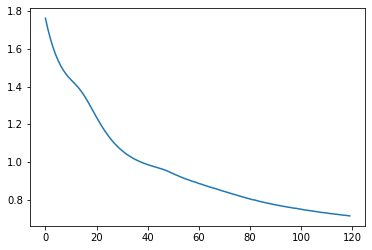

In [1016]:
model_p = model_performance.history
loss_values = model_p['loss']
accuracy = model_p['val_accuracy']
plt.plot(loss_values )
plt.show()

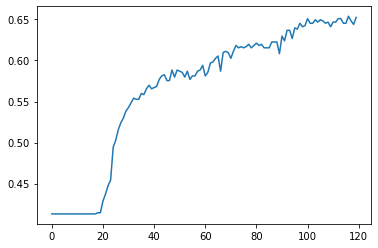

In [924]:
plt.plot(accuracy)
plt.show()

In [925]:
base_model1.evaluate(X_test , y_test)

37/37 [==============================] - 0s 1ms/step - loss: 0.8436 - accuracy: 0.6430


[0.8436048626899719, 0.643040120601654]

In [884]:
actual_ratings = y_test

In [885]:
predict = base_model1.predict_classes(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [1039]:
predict = predict.reshape(-1,1)

In [926]:
ratings_2 = pd.DataFrame({
    "Actual": actual_ratings.ravel(),
    "Predicted": predict.ravel()
    }, index = main_df.index[-len(actual_ratings): ])

In [927]:
ratings_2.head(400)

,Actual,Predicted
3510,3,3
3511,4,4
3512,5,5
3513,5,3
3514,3,1
3515,5,5
3516,3,3
3517,5,5
3518,5,5
3519,5,5


In [928]:
gg = confusion_matrix(y_test , predict)

In [929]:
cm = pd.DataFrame(
    gg, index=["Actual 1", "Actual 2", 'Actual 3',  'Actual 4', 'Actual 5'], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5"]
)
display(cm)

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,50,0,26,3,1
Actual 2,21,0,44,9,2
Actual 3,9,0,71,78,5
Actual 4,3,0,39,206,103
Actual 5,5,0,13,56,427


In [1037]:
from sklearn.metrics import roc_curve, auc

In [1040]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predict)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

ValueError: multiclass format is not supported

In [930]:
from sklearn.metrics import  accuracy_score

In [931]:
acc = accuracy_score(y_test, predict)
print(acc)

0.6438941076003416


In [932]:

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [933]:
X_train.shape

(3510, 67)

In [674]:
def base_nn(): 
    base_model1 = Sequential()
    base_model1.add(Dense(134 , input_dim = X_train.shape[1], activation = 'softmax'))
    base_model1.add(Dense(134, activation = 'softmax'))
    base_model1.add(Dense(6, activation = 'sigmoid'))
    base_model1.compile(loss = 'sparse_categorical_crossentropy' , optimizer = "adam" , metrics = ['accuracy'] )
    return base_model1
    

In [939]:
estimator = KerasRegressor(build_fn=base_nn, validation_split = 0.2, batch_size=120, epochs=64, verbose=0, callbacks = [LearningRateScheduler(lr_time_based_decay)])
history = estimator.fit(X_train, y_train)

In [935]:
pd.set_option('display.max_rows' , 400)

In [936]:
new_x = main_df.iloc[:,0:67].columns

In [937]:
main_df_2 = main_df
main_df_2 = main_df_2.drop(labels= ['reviews.val.reviewRatings.overall'], axis = 1)

In [938]:
main_df.iloc[:,0:67].columns

Index(['salary.salaries', 'reviews.val.reviewRatings.careerOpportunities',
       'reviews.val.reviewRatings.compBenefits',
       'reviews.val.reviewRatings.cultureValues',
       'reviews.val.reviewRatings.seniorManagement',
       'reviews.val.reviewRatings.worklifeBalance',
       'reviews.val.summaryPoints.ceoApproval',
       'gaTrackerData.sector_Accounting & Legal',
       'gaTrackerData.sector_Aerospace & Defense',
       'gaTrackerData.sector_Agriculture & Forestry',
       'gaTrackerData.sector_Arts, Entertainment & Recreation',
       'gaTrackerData.sector_Biotech & Pharmaceuticals',
       'gaTrackerData.sector_Business Services',
       'gaTrackerData.sector_Construction, Repair & Maintenance',
       'gaTrackerData.sector_Consumer Services',
       'gaTrackerData.sector_Education', 'gaTrackerData.sector_Finance',
       'gaTrackerData.sector_Government', 'gaTrackerData.sector_Health Care',
       'gaTrackerData.sector_Information Technology',
       'gaTrackerData.sector

In [1041]:
print(classification_report(predict , y_test))

              precision    recall  f1-score   support

           1       0.62      0.57      0.60        88
           2       0.00      0.00      0.00         0
           3       0.44      0.37      0.40       193
           4       0.59      0.59      0.59       352
           5       0.85      0.79      0.82       538

    accuracy                           0.64      1171
   macro avg       0.50      0.46      0.48      1171
weighted avg       0.69      0.64      0.66      1171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [940]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = main_df.iloc[:,0:67].columns.tolist(), top = 100)

Weight,Feature
0.0932 ± 0.0070,reviews.val.reviewRatings.seniorManagement
0.0803 ± 0.0060,reviews.val.reviewRatings.cultureValues
0.0562 ± 0.0081,reviews.val.reviewerInformation_Former Employee
0.0468 ± 0.0046,reviews.val.reviewRatings.careerOpportunities
0.0362 ± 0.0046,reviews.val.reviewerInformation_Current Employee
0.0309 ± 0.0039,reviews.val.reviewerDuration_for more than a year
0.0241 ± 0.0037,reviews.val.reviewRatings.compBenefits
0.0187 ± 0.0042,new_location_USA
0.0146 ± 0.0013,reviews.val.reviewerDuration_for less than a year
0.0137 ± 0.0028,reviews.val.reviewerDuration_for more than 3 years


In [946]:
model_3 = svm.SVC()

In [947]:
simple_model = model_3.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [948]:
predictions = simple_model.predict(X_test)

In [967]:
predictions = predictions.reshape(-1,1)

In [968]:
predictions

array([[3],
       [4],
       [5],
       [4],
       [1],
       [5],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [5],
       [4],
       [3],
       [5],
       [5],
       [5],
       [4],
       [3],
       [5],
       [5],
       [3],
       [4],
       [4],
       [5],
       [1],
       [5],
       [5],
       [5],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [5],
       [1],
       [4],
       [5],
       [3],
       [1],
       [4],
       [5],
       [5],
       [5],
       [3],
       [1],
       [5],
       [4],
       [3],
       [5],
       [4],
       [4],
       [5],
       [3],
       [4],
       [4],
       [4],
       [4],
       [1],
       [5],
       [4],
       [3],
       [1],
       [3],
       [1],
       [5],
       [3],
       [3],
       [5],
       [1],
       [5],
       [5],
       [4],
       [4],
       [5],
       [5],
       [5],
    

In [950]:
ratings_4 = pd.DataFrame({
    "Actual": actual_ratings.ravel(),
    "Predicted": predictions.ravel()
    }, index = main_df.index[-len(actual_ratings): ])

In [972]:
ratings_4.head(400)

,Actual,Predicted
3510,3,3
3511,4,4
3512,5,5
3513,5,4
3514,3,1
3515,5,5
3516,3,4
3517,5,5
3518,5,5
3519,5,5


In [973]:
gg_2 = confusion_matrix(y_test , predictions)

In [974]:
cm_2 = pd.DataFrame(
    gg_2, index=["Actual 1", "Actual 2", 'Actual 3',  'Actual 4', 'Actual 5'], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5"]
)
display(cm_2)

,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,48,4,24,4,0
Actual 2,15,6,42,13,0
Actual 3,7,2,60,90,4
Actual 4,15,1,31,207,97
Actual 5,23,0,4,68,406


In [975]:
gg_3 = accuracy_score(y_test , predictions)

In [976]:
print(gg_3)

0.6208368915456874


In [979]:
loss_values_3 = simple_model.loss_values
loss_values = model_p3['loss']
accuracy = model_p3['accuracy']
plt.plot(loss_values_3 )
plt.show()

AttributeError: 'SVC' object has no attribute 'loss_values'

In [1017]:
base_model_3 = Sequential()
base_model_3.add(Dense(134, input_dim = X_train.shape[1], activation = 'softmax'))
base_model_3.add(Dense(6, activation = 'sigmoid'))
base_model_3.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [1018]:
model_p_final = base_model_3.fit(X_train , y_train , epochs = 120 , batch_size = 64 ,validation_split = 0.2)

Epoch 1/120
44/44 [==============================] - 1s 5ms/step - loss: 1.7695 - accuracy: 0.3698 - val_loss: 1.7186 - val_accuracy: 0.4131
Epoch 2/120
44/44 [==============================] - 0s 2ms/step - loss: 1.6991 - accuracy: 0.4036 - val_loss: 1.6587 - val_accuracy: 0.4131
Epoch 3/120
44/44 [==============================] - 0s 2ms/step - loss: 1.6344 - accuracy: 0.4305 - val_loss: 1.6066 - val_accuracy: 0.4131
Epoch 4/120
44/44 [==============================] - 0s 2ms/step - loss: 1.5837 - accuracy: 0.4118 - val_loss: 1.5611 - val_accuracy: 0.4131
Epoch 5/120
44/44 [==============================] - 0s 2ms/step - loss: 1.5263 - accuracy: 0.4171 - val_loss: 1.5228 - val_accuracy: 0.4131
Epoch 6/120
44/44 [==============================] - 0s 2ms/step - loss: 1.4872 - accuracy: 0.4198 - val_loss: 1.4906 - val_accuracy: 0.4131
Epoch 7/120
44/44 [==============================] - 0s 3ms/step - loss: 1.4524 - accuracy: 0.4219 - val_loss: 1.4639 - val_accuracy: 0.4131
Epoch 8/120
4

Epoch 59/120
44/44 [==============================] - 0s 3ms/step - loss: 0.8961 - accuracy: 0.6243 - val_loss: 0.9555 - val_accuracy: 0.5783
Epoch 60/120
44/44 [==============================] - 0s 2ms/step - loss: 0.8868 - accuracy: 0.6258 - val_loss: 0.9518 - val_accuracy: 0.5869
Epoch 61/120
44/44 [==============================] - 0s 2ms/step - loss: 0.8930 - accuracy: 0.6270 - val_loss: 0.9487 - val_accuracy: 0.5826
Epoch 62/120
44/44 [==============================] - 0s 2ms/step - loss: 0.9042 - accuracy: 0.6216 - val_loss: 0.9448 - val_accuracy: 0.5912
Epoch 63/120
44/44 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.6338 - val_loss: 0.9418 - val_accuracy: 0.5969
Epoch 64/120
44/44 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.6335 - val_loss: 0.9389 - val_accuracy: 0.5983
Epoch 65/120
44/44 [==============================] - 0s 2ms/step - loss: 0.8719 - accuracy: 0.6339 - val_loss: 0.9351 - val_accuracy: 0.6054
Epoch 

44/44 [==============================] - 0s 2ms/step - loss: 0.7669 - accuracy: 0.6892 - val_loss: 0.8420 - val_accuracy: 0.6353
Epoch 117/120
44/44 [==============================] - 0s 2ms/step - loss: 0.7712 - accuracy: 0.6796 - val_loss: 0.8402 - val_accuracy: 0.6368
Epoch 118/120
44/44 [==============================] - ETA: 0s - loss: 0.7168 - accuracy: 0.76 - 0s 2ms/step - loss: 0.7569 - accuracy: 0.6906 - val_loss: 0.8393 - val_accuracy: 0.6410
Epoch 119/120
44/44 [==============================] - 0s 2ms/step - loss: 0.7475 - accuracy: 0.6943 - val_loss: 0.8388 - val_accuracy: 0.6382
Epoch 120/120
44/44 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.6899 - val_loss: 0.8380 - val_accuracy: 0.6382


In [1023]:
base_model_3.evaluate(X_test , y_test)

37/37 [==============================] - 0s 803us/step - loss: 0.8396 - accuracy: 0.6319


[0.8395904302597046, 0.6319385170936584]

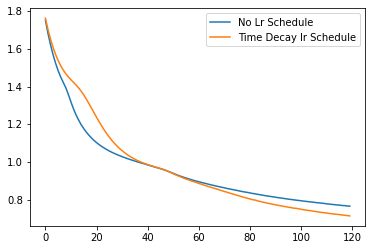

In [1035]:
model_p_3 = model_p_final.history
loss_values_final = model_p_3['loss']
accuracy_final = model_p_3['val_accuracy']
plt.plot( loss_values_final ,label = 'No Lr Schedule')
plt.plot(loss_values, label = 'Time Decay lr Schedule')
plt.legend()

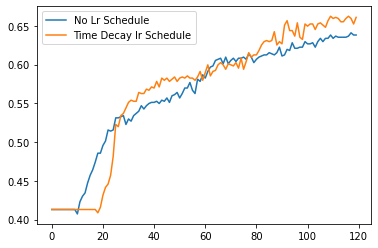

In [1036]:
plt.plot( accuracy_final ,label = 'No Lr Schedule')
plt.plot(accuracy, label = 'Time Decay lr Schedule')
plt.legend()